In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
faces = np.load('placas.npy')

In [3]:
m, n = 65, 200
nfaces = np.array([64] * 38)
nfaces

array([64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
       64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
       64, 64, 64, 64])

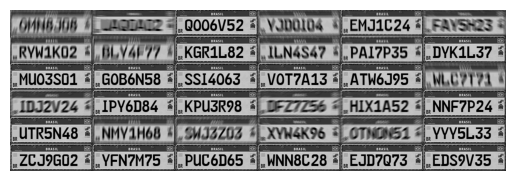

In [4]:
allPersons = np.zeros((n* 6, m * 6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1

img = plt.imshow(allPersons.T, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces,axis=1)

In [6]:
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T

In [14]:
X.shape

(13000, 2304)

In [7]:
U, S, VT = np.linalg.svd(X, full_matrices=False)

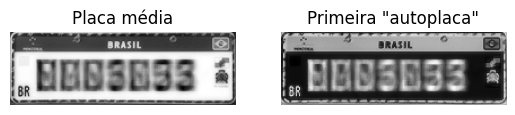

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)), cmap='gray')
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)), cmap='gray')
ax1.axis('off')
ax2.axis('off')
# titulos
ax1.set_title('Placa média')
ax2.set_title('Primeira "autoplaca"') # autovalor reshaped
plt.show()

Muito interessante! Perceba como todos os dígitos se assemelham a um display alfanumérico desligado.

0
1
2
3
4


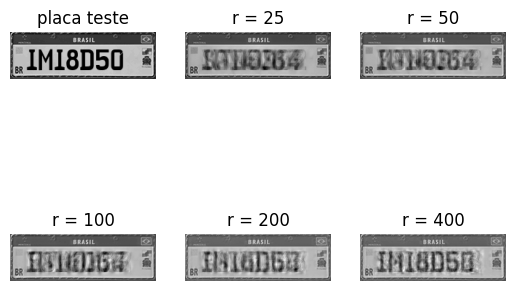

In [9]:
testFace = faces[:,np.sum(nfaces[:36])]
testFaceMS = testFace - avgFace
r_list = [25, 50, 100, 200, 400]
# create 2x4 grid
fig, axs = plt.subplots(2, 3)

# plot test face
axs[0, 0].imshow(np.reshape(testFace,(m,n)), cmap='gray')
axs[0, 0].set_title('placa teste')
axs[0, 0].axis('off')

for i, ax in enumerate(axs.flat[1:]):
    print(i)
    r = r_list[i]
    reconFace = avgFace + U[:,:r] @ U[:,:r].T @ testFaceMS
    faceshow = np.reshape(reconFace,(m,n))
    ax.imshow(faceshow, cmap='gray')
    ax.set_title('r = ' + str(r))
    ax.axis('off')
plt.show()

Vamos testar com uma imagem externa ao banco.

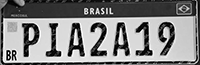

In [10]:
# mais um teste
test_im = Image.open('teste.png')
test_im = test_im.convert('L')
test_im

25
50
100
200
400


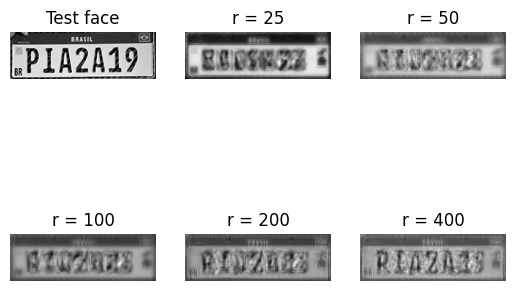

In [11]:
test_im = np.array(test_im).flatten()
test_im_ms = test_im - avgFace

r_list = [25, 50, 100, 200, 400]
# create 2x4 grid
fig, axs = plt.subplots(2, 3)

# plot test face
axs[0, 0].imshow(np.reshape(test_im,(m,n)), cmap='gray')
axs[0, 0].set_title('Test face')
axs[0, 0].axis('off')

for i, ax in enumerate(axs.flat[1:]):
    r = r_list[i]
    print(r)
    reconFace = avgFace + U[:,:r] @ U[:,:r].T @ test_im_ms
    faceshow = np.reshape(reconFace,(m,n))
    ax.imshow(faceshow, cmap='gray')
    ax.set_title('r = ' + str(r))
    ax.axis('off')
plt.show()

Vamos testar com uma imagem externa _e com ruído_.

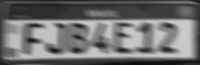

In [12]:
# mais um teste
test_im2 = Image.open('teste-blur.png')
test_im2 = test_im2.convert('L')
# test_img rescale to 200, 65
test_im2 = test_im2.resize((200, 65))
test_im2

25
50
100
200
400


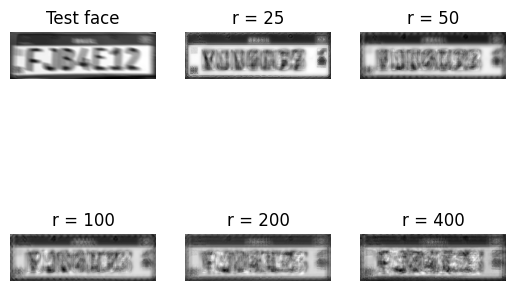

In [13]:
test_im2 = np.array(test_im2).flatten()
test_im2_ms = test_im2 - avgFace

r_list = [25, 50, 100, 200, 400]
# create 2x4 grid
fig, axs = plt.subplots(2, 3)

# plot test face
axs[0, 0].imshow(np.reshape(test_im2,(m,n)), cmap='gray')
axs[0, 0].set_title('Test face')
axs[0, 0].axis('off')

for i, ax in enumerate(axs.flat[1:]):
    r = r_list[i]
    print(r)
    reconFace = avgFace + U[:,:r] @ U[:,:r].T @ test_im2_ms
    faceshow = np.reshape(reconFace,(m,n))
    ax.imshow(faceshow, cmap='gray')
    ax.set_title('r = ' + str(r))
    ax.axis('off')
plt.show()

Kernel

KV = V\Lambda
\tilde{X} = R\Lambda^{\frac{1}{2}}V^T
argmin(R) ||X- R\Lambda^1/2V^T||_F^2

"polinomial, algo assim..."

"e um baseado em distância! (radial...)"